In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import seaborn as sbn

In [59]:
plots_destination_path = '../../Results/Preprocessing-Plots/Dataset1/'

In [60]:
df = pd.read_csv("../../data/raw-data/risk_factors_cervical_cancer.csv")
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [61]:
print(f"Raw data shape = {df.shape}")

Raw data shape = (858, 36)


In [62]:
#Checking for null values
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [63]:
target = df['Biopsy']
features = df.drop(['Biopsy'], axis=1)
print(f"Initial dimensions = {features.shape}")

Initial dimensions = (858, 35)


In [64]:
target = df['Biopsy']
features = df.drop(['Biopsy'], axis=1)
print(f"Initial dimensions = {features.shape}")

Initial dimensions = (858, 35)


In [65]:
# Replace '?' by NaN
features.replace("?", np.NaN, inplace=True)

In [89]:
# Checking percentage of NaN values in a column
x = (features.isna().sum() / features.shape[0]) * 100
print("Percentage of NaN values")
print(x)

Percentage of NaN values
Age                                    0.000000
Number of sexual partners              3.030303
First sexual intercourse               0.815851
Num of pregnancies                     6.526807
Smokes                                 1.515152
Smokes (years)                         1.515152
Smokes (packs/year)                    1.515152
Hormonal Contraceptives               12.587413
Hormonal Contraceptives (years)       12.587413
IUD                                   13.636364
IUD (years)                           13.636364
STDs                                  12.237762
STDs (number)                         12.237762
STDs:condylomatosis                   12.237762
STDs:cervical condylomatosis          12.237762
STDs:vaginal condylomatosis           12.237762
STDs:vulvo-perineal condylomatosis    12.237762
STDs:syphilis                         12.237762
STDs:pelvic inflammatory disease      12.237762
STDs:genital herpes                   12.237762
STDs:molluscum 

In [9]:
features.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)
print(features.columns)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology'],
      dtype='object')


In [10]:
print(features.dtypes)
features = features.apply(pd.to_numeric)

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [11]:
print("Unique Values")
for col in features.columns:
    print(f"{col} : {list(features[col].unique())}")

Unique Values
Age : [18, 15, 34, 52, 46, 42, 51, 26, 45, 44, 27, 43, 40, 41, 39, 37, 38, 36, 35, 33, 31, 32, 30, 23, 28, 29, 20, 25, 21, 24, 22, 48, 19, 17, 16, 14, 59, 79, 84, 47, 13, 70, 50, 49]
Number of sexual partners : [4.0, 1.0, 5.0, 3.0, 2.0, 6.0, nan, 7.0, 15.0, 8.0, 10.0, 28.0, 9.0]
First sexual intercourse : [15.0, 14.0, nan, 16.0, 21.0, 23.0, 17.0, 26.0, 20.0, 25.0, 18.0, 27.0, 19.0, 24.0, 32.0, 13.0, 29.0, 11.0, 12.0, 22.0, 28.0, 10.0]
Num of pregnancies : [1.0, 4.0, 2.0, 6.0, 3.0, 5.0, nan, 8.0, 7.0, 0.0, 11.0, 10.0]
Smokes : [0.0, 1.0, nan]
Smokes (years) : [0.0, 37.0, 34.0, 1.266972909, 3.0, 12.0, nan, 18.0, 7.0, 19.0, 21.0, 15.0, 13.0, 16.0, 8.0, 4.0, 10.0, 22.0, 14.0, 0.5, 11.0, 9.0, 2.0, 5.0, 6.0, 1.0, 32.0, 24.0, 28.0, 20.0, 0.16]
Smokes (packs/year) : [0.0, 37.0, 3.4, 2.8, 0.04, 0.5132021277, 2.4, 6.0, nan, 9.0, 1.6, 19.0, 21.0, 0.32, 2.6, 0.8, 15.0, 2.0, 5.7, 1.0, 3.3, 3.5, 12.0, 0.025, 2.75, 0.2, 1.4, 5.0, 2.1, 0.7, 1.2, 7.5, 1.25, 3.0, 0.75, 0.1, 8.0, 2.25, 0.00

In [12]:
numerical_columns = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 
                     'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)']
categorical_columns =  list(set(features.columns) - set(numerical_columns))

In [94]:
print(numerical_columns)
print(categorical_columns)

['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)']
['Smokes', 'Citology', 'STDs:vulvo-perineal condylomatosis', 'STDs:molluscum contagiosum', 'STDs', 'STDs:genital herpes', 'STDs:vaginal condylomatosis', 'STDs:HPV', 'Dx:HPV', 'STDs:pelvic inflammatory disease', 'STDs:HIV', 'Dx:CIN', 'STDs:condylomatosis', 'Hinselmann', 'STDs:syphilis', 'Dx', 'IUD', 'STDs: Number of diagnosis', 'Schiller', 'STDs:Hepatitis B', 'Hormonal Contraceptives', 'Dx:Cancer']


In [13]:
for col in numerical_columns:
    features[col].fillna(value=features[col].median(), inplace=True)
for col in categorical_columns:
    features[col].fillna(value=features[col].mode()[0], inplace=True)

In [14]:
features.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [15]:
# Checking percentage of NaN values in a column
(features.isna().sum() / features.shape[0]) * 100

Age                                   0.0
Number of sexual partners             0.0
First sexual intercourse              0.0
Num of pregnancies                    0.0
Smokes                                0.0
Smokes (years)                        0.0
Smokes (packs/year)                   0.0
Hormonal Contraceptives               0.0
Hormonal Contraceptives (years)       0.0
IUD                                   0.0
IUD (years)                           0.0
STDs                                  0.0
STDs (number)                         0.0
STDs:condylomatosis                   0.0
STDs:cervical condylomatosis          0.0
STDs:vaginal condylomatosis           0.0
STDs:vulvo-perineal condylomatosis    0.0
STDs:syphilis                         0.0
STDs:pelvic inflammatory disease      0.0
STDs:genital herpes                   0.0
STDs:molluscum contagiosum            0.0
STDs:AIDS                             0.0
STDs:HIV                              0.0
STDs:Hepatitis B                  

In [16]:
print("Unique Values")
for col in features.columns:
    print(f"{col} : {list(features[col].unique())}")

Unique Values
Age : [18, 15, 34, 52, 46, 42, 51, 26, 45, 44, 27, 43, 40, 41, 39, 37, 38, 36, 35, 33, 31, 32, 30, 23, 28, 29, 20, 25, 21, 24, 22, 48, 19, 17, 16, 14, 59, 79, 84, 47, 13, 70, 50, 49]
Number of sexual partners : [4.0, 1.0, 5.0, 3.0, 2.0, 6.0, 7.0, 15.0, 8.0, 10.0, 28.0, 9.0]
First sexual intercourse : [15.0, 14.0, 17.0, 16.0, 21.0, 23.0, 26.0, 20.0, 25.0, 18.0, 27.0, 19.0, 24.0, 32.0, 13.0, 29.0, 11.0, 12.0, 22.0, 28.0, 10.0]
Num of pregnancies : [1.0, 4.0, 2.0, 6.0, 3.0, 5.0, 8.0, 7.0, 0.0, 11.0, 10.0]
Smokes : [0.0, 1.0]
Smokes (years) : [0.0, 37.0, 34.0, 1.266972909, 3.0, 12.0, 18.0, 7.0, 19.0, 21.0, 15.0, 13.0, 16.0, 8.0, 4.0, 10.0, 22.0, 14.0, 0.5, 11.0, 9.0, 2.0, 5.0, 6.0, 1.0, 32.0, 24.0, 28.0, 20.0, 0.16]
Smokes (packs/year) : [0.0, 37.0, 3.4, 2.8, 0.04, 0.5132021277, 2.4, 6.0, 9.0, 1.6, 19.0, 21.0, 0.32, 2.6, 0.8, 15.0, 2.0, 5.7, 1.0, 3.3, 3.5, 12.0, 0.025, 2.75, 0.2, 1.4, 5.0, 2.1, 0.7, 1.2, 7.5, 1.25, 3.0, 0.75, 0.1, 8.0, 2.25, 0.003, 7.0, 0.45, 0.15, 0.05, 0.25

In [17]:
features.drop(['STDs:cervical condylomatosis', 'STDs:AIDS'], axis=1, inplace=True)
categorical_columns = list(set(categorical_columns) - set(['STDs:cervical condylomatosis', 'STDs:AIDS']))
print(features.shape)

(858, 31)


In [18]:
df_final = pd.concat([features, target], axis = 1)

In [19]:
df_final.drop_duplicates(keep='last', inplace=True)

In [20]:
print(df_final.shape)

(830, 32)


In [ ]:
df_final.to_csv('../../data/preprocessed-data/dataset1.csv')

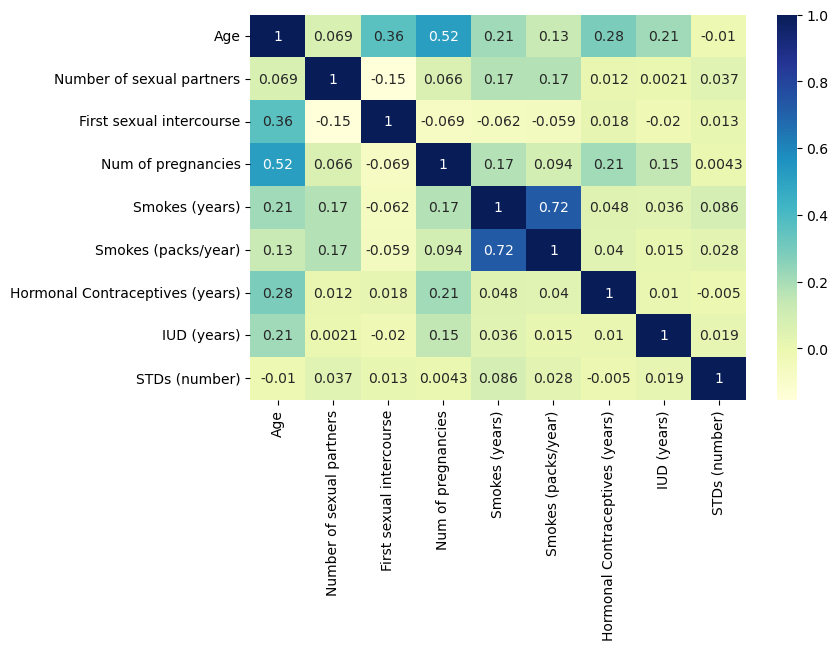

In [34]:
plt.figure(figsize=(8, 5))
sbn.heatmap(df_final[numerical_columns].corr(), cmap="YlGnBu", annot=True)
plt.savefig('../../Results/Preprocessing-Plots/Dataset1/correlation.png', bbox_inches = "tight", facecolor='w')

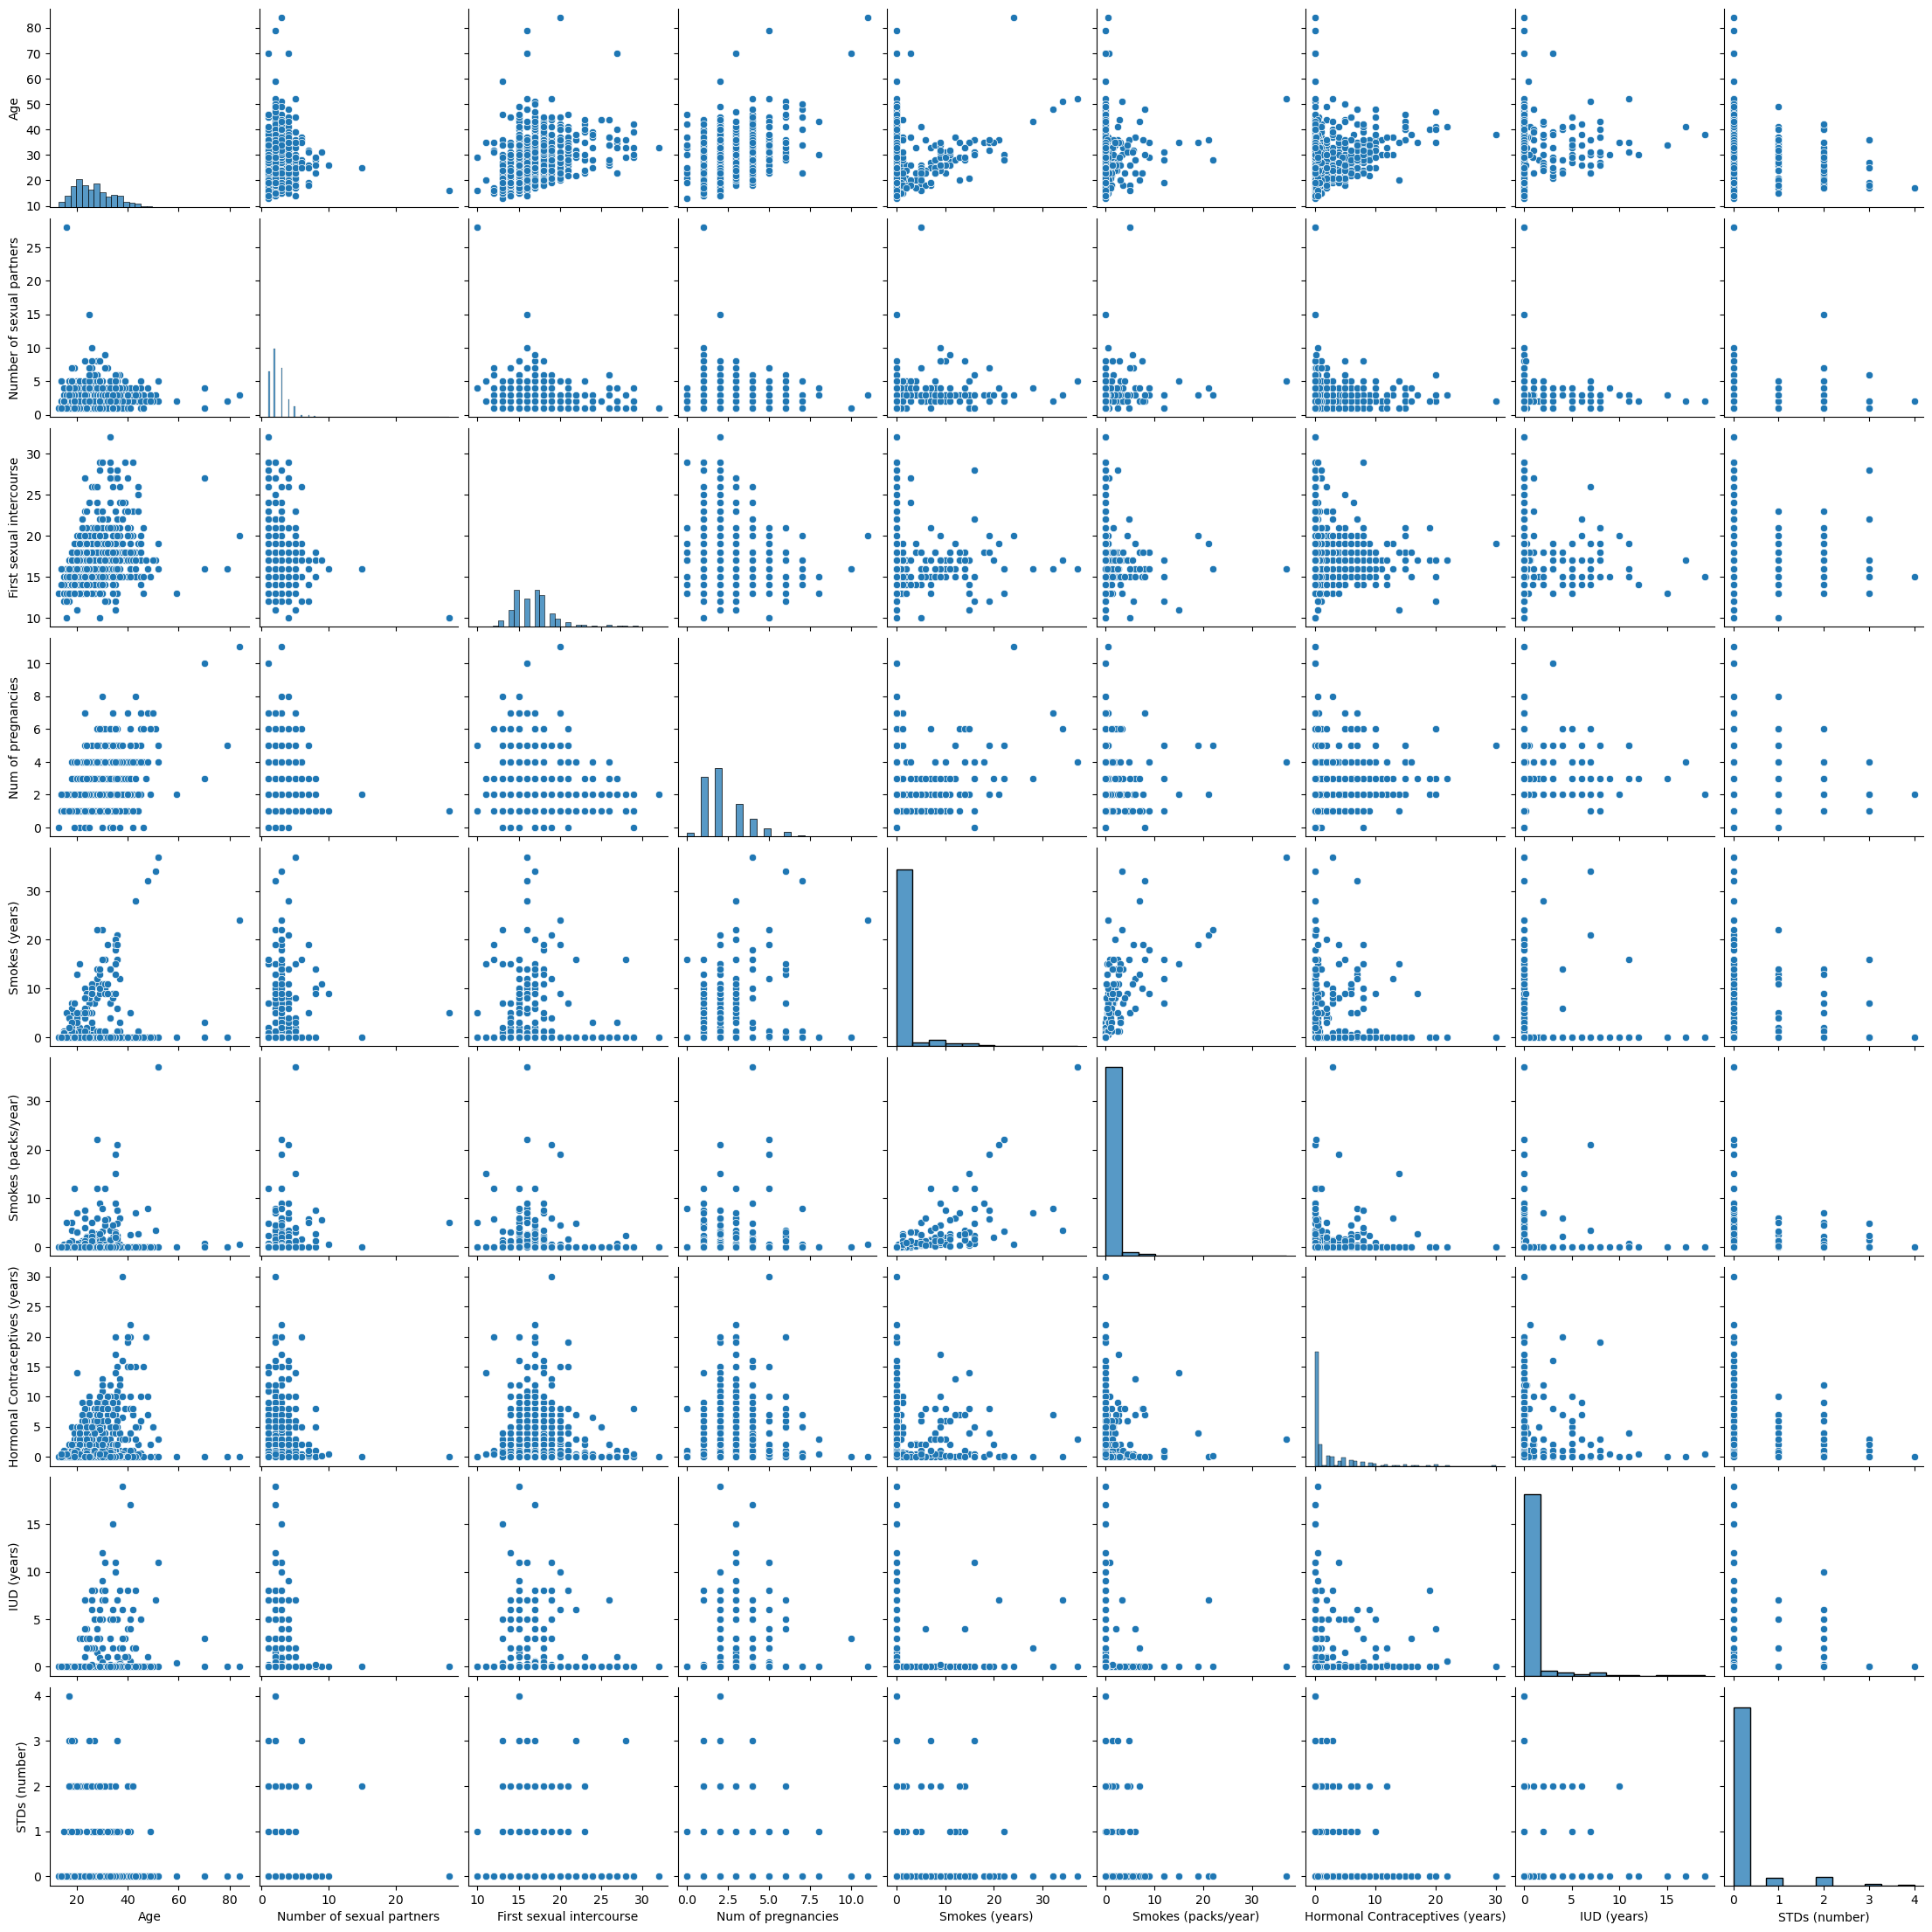

In [30]:
sbn.pairplot(df_final[numerical_columns])
plt.savefig('../../Results/Preprocessing-Plots/Dataset1/pairplot', bbox_inches = "tight", facecolor='w')

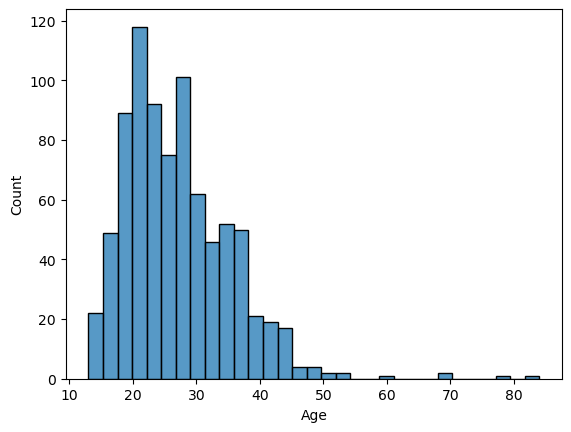

In [37]:
sbn.histplot(df_final['Age'])
plt.savefig(plots_destination_path + 'age_distribution.png')

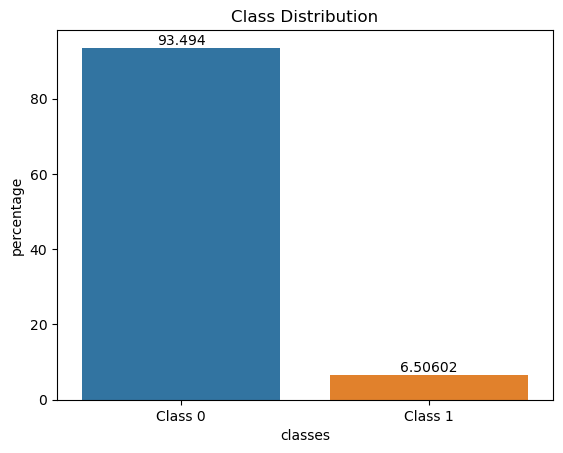

In [92]:
class_dist_df = pd.DataFrame({'classes' : ['Class 0', 'Class 1'], 'percentage' : class_dist})
ax = sbn.barplot(x='classes', y='percentage', data=class_dist_df)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution')
plt.savefig(plots_destination_path + 'class_distribution')

In [21]:
df_final.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,...,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,27.069880,2.539759,17.025301,2.287952,0.148193,1.241765,0.461333,0.693976,2.090644,0.100000,...,0.002410,0.090361,0.021687,0.010843,0.021687,0.028916,0.042169,0.087952,0.051807,0.065060
std,8.485135,1.657744,2.809700,1.410874,0.355505,4.122522,2.245822,0.461118,3.609802,0.300181,...,0.049058,0.307178,0.145746,0.103628,0.145746,0.167671,0.201095,0.283396,0.221771,0.246781
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
